### Profiling after agumentation
#### Because the dataset has been agumented inserting new words in the italian vocabolary and phrases into the dataset we check if the stats computed in the the first profiling iteration have changed

In [2]:
## Data profiling
### 4. Profiling of the dataset
##### Informations computed
#####   4.1. avg len of phrases
#####   4.2 unique words vs not unique words
#####   4.3 Shared words in itlian and not italian vocabolaries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset_agm=pd.read_csv('..\\..\\Dataset\\Dataset_agumented3.csv')
parsed_dataset=pd.read_csv('..\\..\\Dataset\\Lang_det_parsed.csv')

In [5]:
#Analyzing the cardinality of italian and not italian datapoints present in the dataset
italian_entry=dataset_agm[dataset_agm.Class == 1].shape[0]
other=dataset_agm.shape[0]-italian_entry
total=dataset_agm.shape[0]
print('total',total)
print('Non-italian', other)
print('Italian',italian_entry)

print('Total:',total, '100%')

print('Not italian:',other,int((other/total)*100),'%')
print('Italian:',italian_entry,int((italian_entry/total)*100),'%')

total 13013
Non-italian 9639
Italian 3374
Total: 13013 100%
Not italian: 9639 74 %
Italian: 3374 25 %


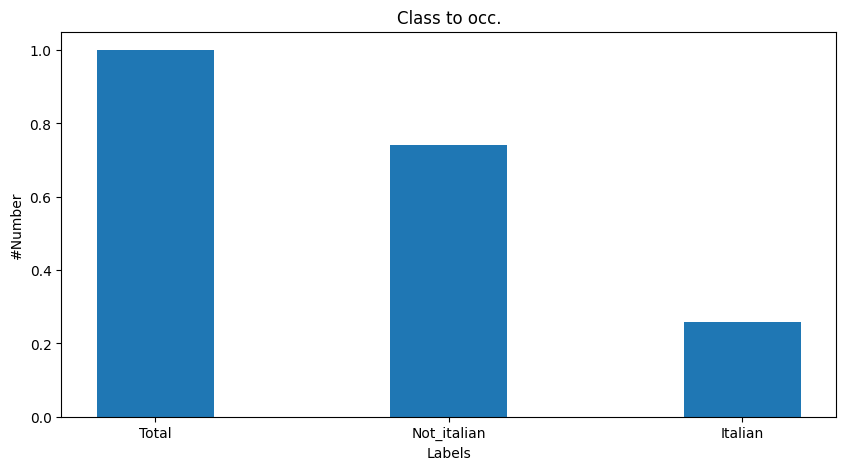

In [6]:
#Plotting the data computed in the prev. cell
entyes={'Total':total/total ,'Not_italian':other/total, 'Italian': italian_entry/total}
Label = list(entyes.keys())
occ = list(entyes.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Label, occ,
        width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("#Number")
plt.title("Class to occ.")
plt.show()

In [7]:
#### Analyzing word stats for italian and not italian observation
#AVG word length of italian texet
italian_avg_words4entry=parsed_dataset[parsed_dataset['Class']==1]['Number of words'].mean()
print("[BEFORE AGUM.]AVG words in italian sentence",italian_avg_words4entry)
italian_avg_words4entry=dataset_agm[dataset_agm['Class']==1]['Number of words'].mean()
print("[AFTER AGUM.]AVG words in italian sentence",italian_avg_words4entry)

[BEFORE AGUM.]AVG words in italian sentence 22.640401146131804
[AFTER AGUM.]AVG words in italian sentence 22.631594546532305


In [8]:
#general function to create a dict <word, count>
def fun_word2count(data):
    word2count=dict()
    
    for i in data:
        try:
            words=i.split(' ')
            for w in words:
                if w in word2count:
                    word2count[w]+=1
                else:
                    word2count[w]=1
        except:
            word2count[w]=1
    word2count=dict(sorted(word2count.items(), key=lambda x: x[1], reverse=True))
    return word2count


In [9]:
#plotting the word
def plot_word2count(word2count,sample):
    words=list(word2count.keys())
    occ=list(word2count.values())
    words_sample=words[0:sample]
    occ_sample=occ[0:sample]
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    
    fig = plt.figure(figsize = (20, 20))
    
    # creating the bar plot
    plt.barh(words_sample, occ_sample,)
    
    plt.xlabel("#occ")
    plt.ylabel("words")
    plt.title("Class to occ.")
    plt.yticks(rotation=40)
    plt.show()

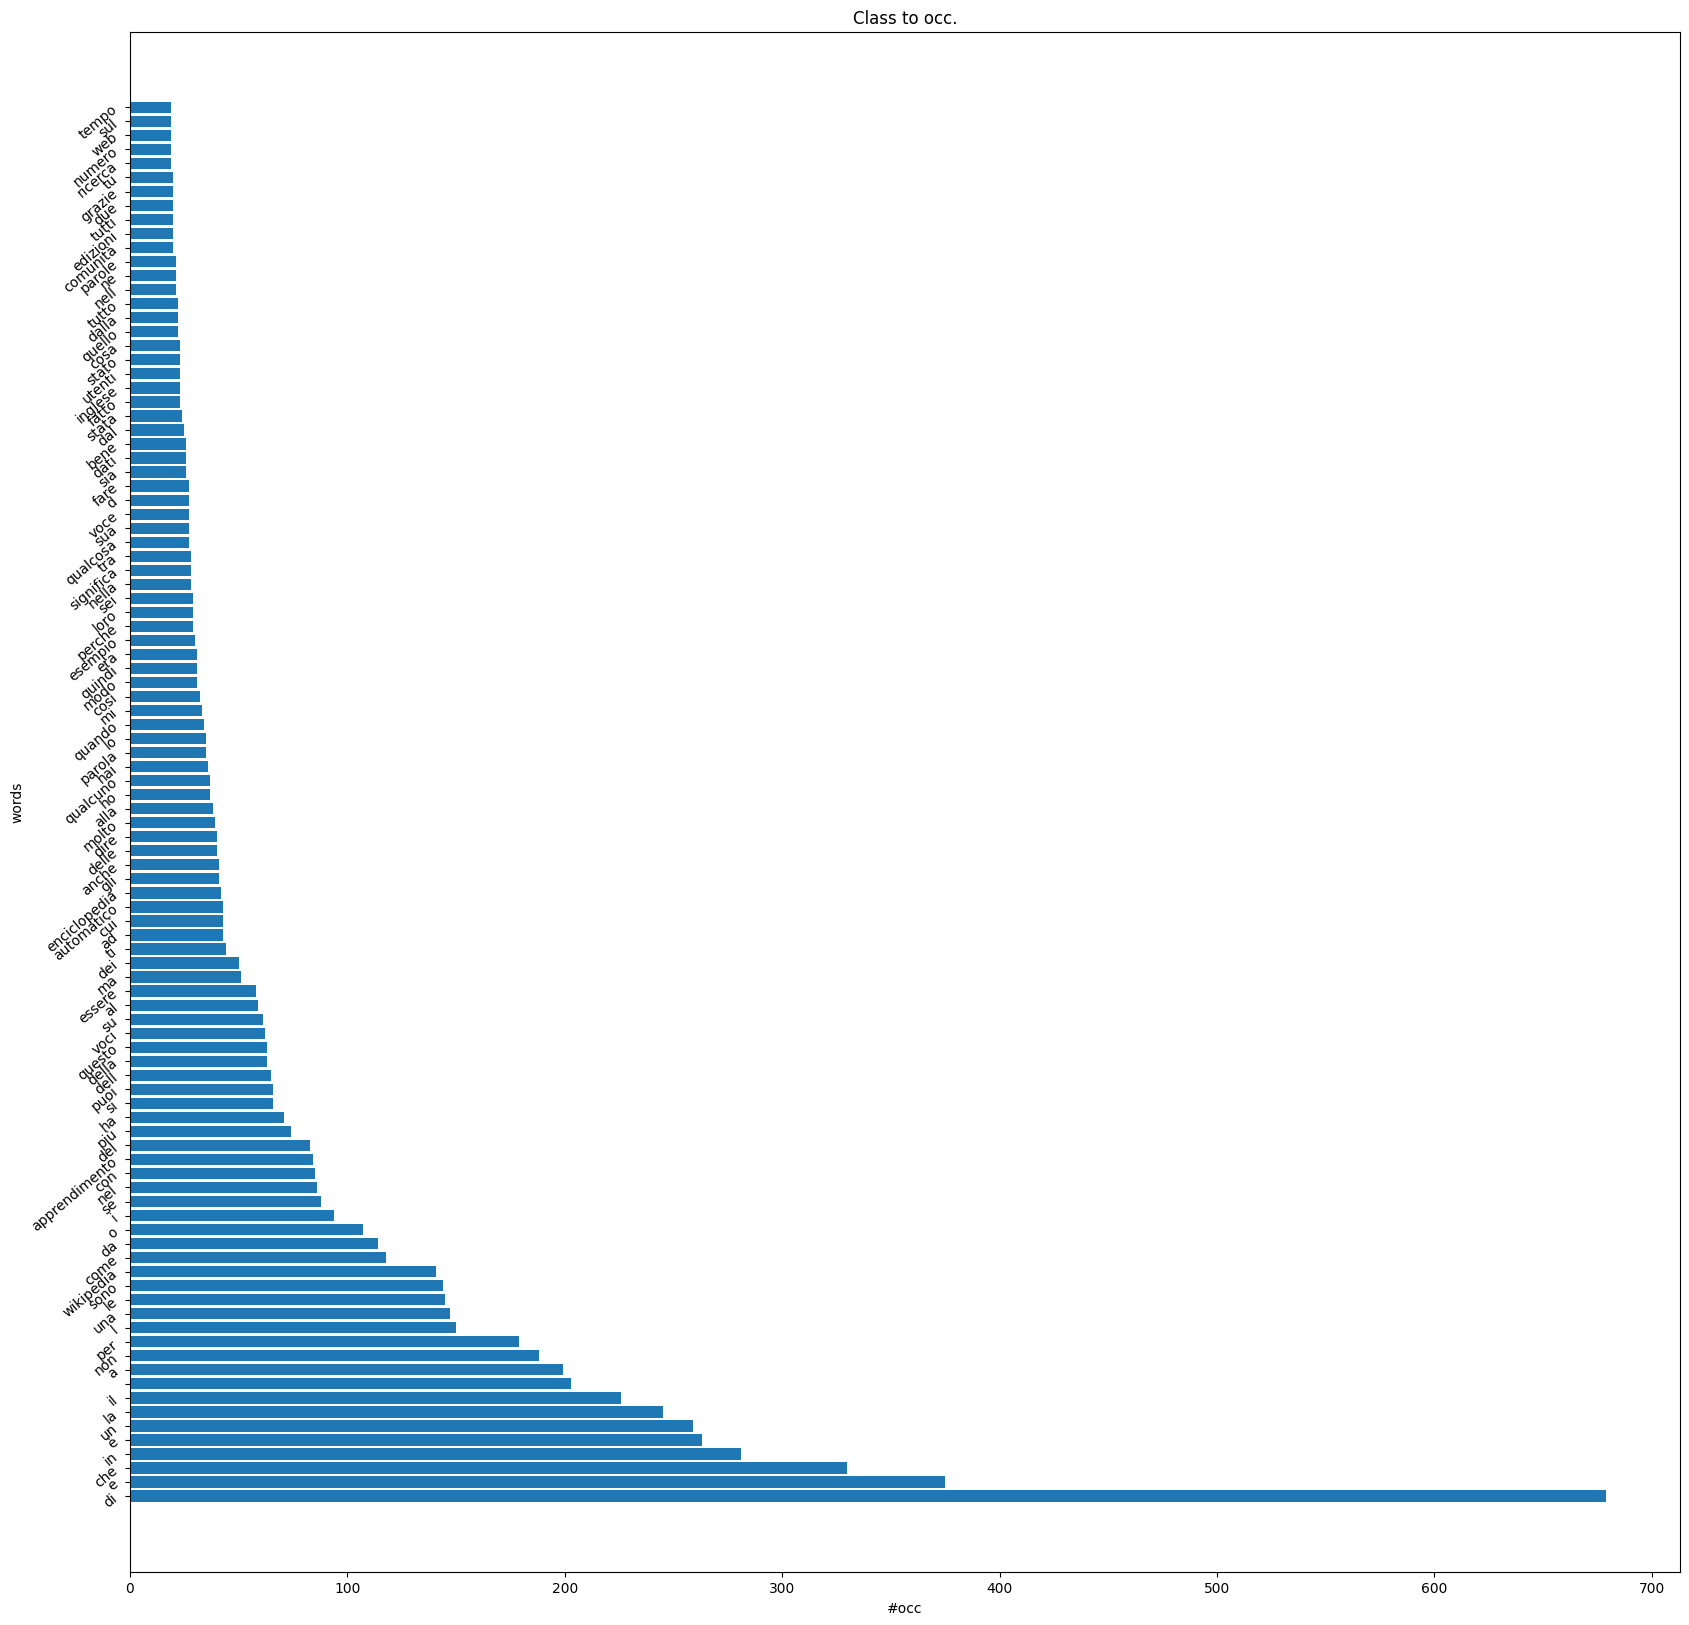

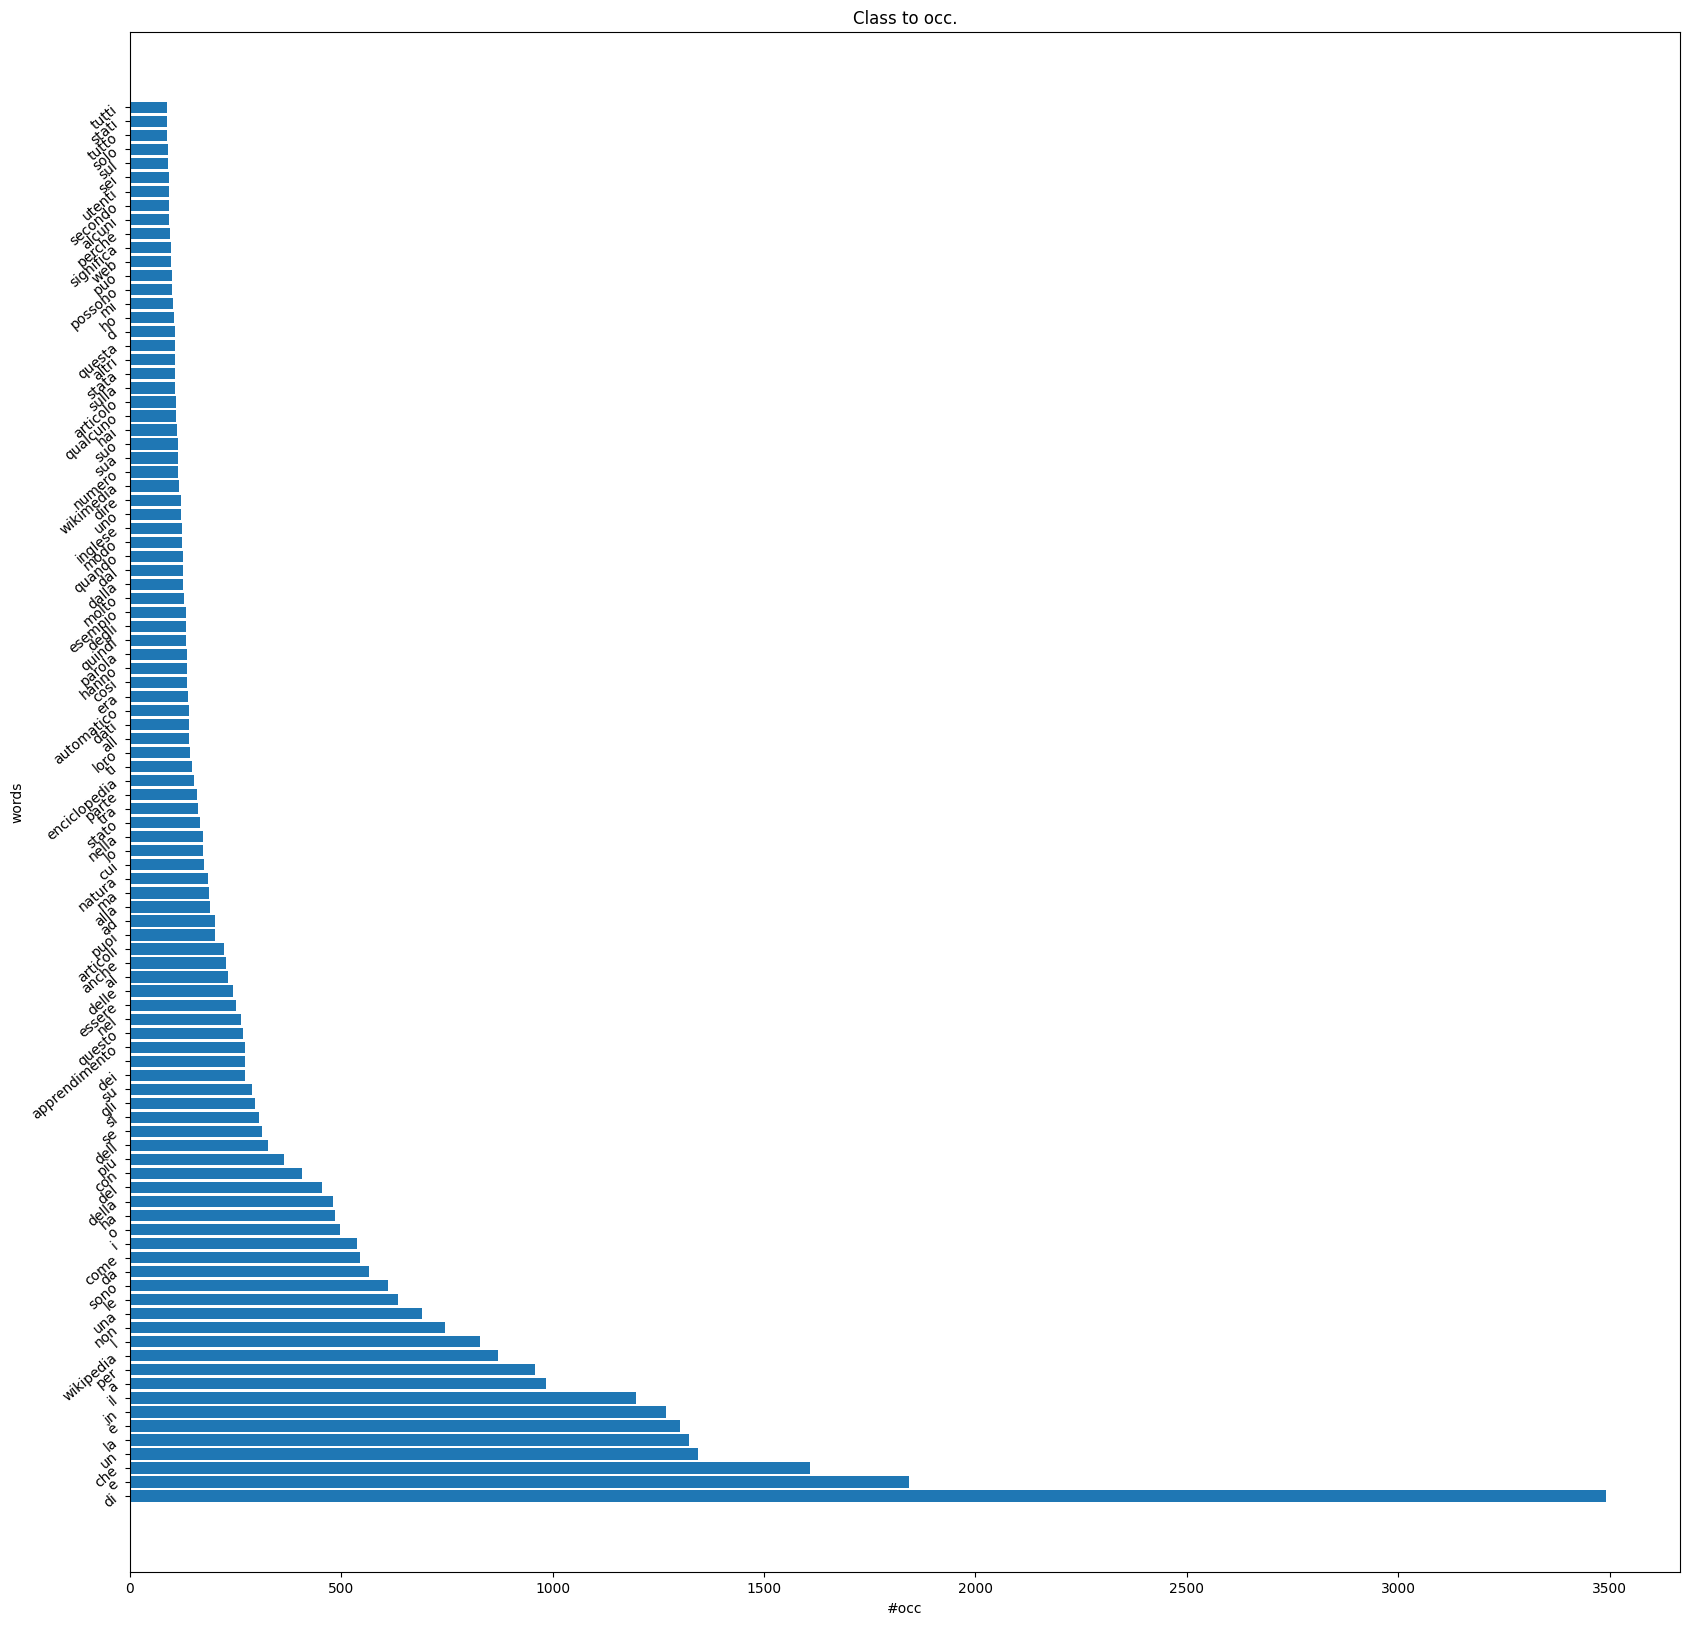

In [10]:
#Computing the dict <word, count> for both italian and not italina phrases
only_italian_bef_AGUM=parsed_dataset[parsed_dataset['Class']==1]['Text']
not_italian_bef_AGUM=parsed_dataset[parsed_dataset['Class']==0]['Text']
only_italian_after_AGUM=dataset_agm[dataset_agm['Class']==1]['Text']

word2count_ita_bef_AGUM=fun_word2count(only_italian_bef_AGUM)
word2count_other_bef_AGUM=fun_word2count(not_italian_bef_AGUM)
word2count_ita_after_AGUM=fun_word2count(only_italian_after_AGUM)

sample=100
plot_word2count(word2count_ita_bef_AGUM,sample)
plot_word2count(word2count_ita_after_AGUM,sample)


In [11]:
#top 20 italain words before agumentation
top_20_italian_words_before_AGUM=list(word2count_ita_bef_AGUM.keys())[:20]
print('BEFORE AGUM')
print(top_20_italian_words_before_AGUM)

#top 20 italian words after agumentation
top_20_italian_words_after_AGUM=list(word2count_ita_after_AGUM.keys())[:20]
print('AFTER AGUM')
print(top_20_italian_words_after_AGUM)



BEFORE AGUM
['di', 'e', 'che', 'in', 'è', 'un', 'la', 'il', '', 'a', 'non', 'per', 'l', 'una', 'le', 'sono', 'wikipedia', 'come', 'da', 'o']
AFTER AGUM
['di', 'e', 'che', 'un', 'la', 'è', 'in', 'il', 'a', 'per', 'wikipedia', 'l', 'non', 'una', 'le', 'sono', 'da', 'come', 'i', 'o']


In [12]:
 #bottom 20 italian words before agumentation
bottom_20_italian_words_before_AGUM=list(word2count_ita_bef_AGUM.keys())[-20:]
print('BEFORE AGUM')
print(bottom_20_italian_words_before_AGUM)

#top 20 italian words after agumentation
bottom_20_italian_words_after_AGUM=list(word2count_ita_after_AGUM.keys())[-20:]
print('AFTER AGUM')
print(bottom_20_italian_words_after_AGUM)


#bottom 20 itlaian words after agumentation

BEFORE AGUM
['rivederti', 'avevi', 'inutile', 'importava', 'affatto', 'rendi', 'trattavi', 'comportato', 'carino', 'cambiato', 'lottato', 'pazientemente', 'vennero', 'incontrare', 'diteci', 'narcisismo', 'entrambi', 'cambiata', 'vorrebbe', 'assomigli']
AFTER AGUM
['neanche', 'pm', 'cominciamo', 'risponda', 'cortesemente', 'dessi', 'menzionarlo', 'scusarsi', 'amava', 'finisse', 'riteneva', 'rifiutava', 'svegliata', 'fissando', 'narcissus', 'avvicinò', 'sciocco', 'affamato', 'sposato', 'arrivata']


In [13]:
#Estimating words present in both italain and not italian vocabolary



#looking for the number of repeted words as rows*mean_words4prhase-total_unique_words)
#After Agumentation
italian_words_after_Agum=set(word2count_ita_after_AGUM.keys())    #set of itlaian words (italain vocabolary)
rows_After_AGUM=len(only_italian_after_AGUM)
total_unique_words_After_agum=len(word2count_ita_after_AGUM)
total_words_After_Agum=italian_avg_words4entry*rows_After_AGUM
words_not_unique_After_Agum=total_words_After_Agum-total_unique_words_After_agum

#BEFORE AGUMENTATION
italian_words_before_AGUM=set(word2count_ita_bef_AGUM.keys())    #set of itlaian words (italain vocabolary)

#looking for the number of repeted words as rows*mean_words4prhase-total_unique_words)
rows=len(only_italian_bef_AGUM)
total_unique_words=len(word2count_ita_bef_AGUM)
total_words=italian_avg_words4entry*rows
words_not_unique=total_words-total_unique_words
print('[BEFORE AGUM] Expected total words',total_words)
print('[AFTER AGUM] Expected total words',total_words_After_Agum)

print('[BEFORE AGUM] Total unique words:',total_unique_words)
print('[AFTER AGUM] Total unique words:',total_unique_words_After_agum)

print('[BEFORE AGUM] Potential not unique',words_not_unique)
print('[AFTER AGUM] Potential not unique',words_not_unique_After_Agum)






[BEFORE AGUM] Expected total words 15796.85299347955
[AFTER AGUM] Expected total words 76359.0
[BEFORE AGUM] Total unique words: 3757
[AFTER AGUM] Total unique words: 9671
[BEFORE AGUM] Potential not unique 12039.85299347955
[AFTER AGUM] Potential not unique 66688.0


In [14]:
#lets see now the common and not common words in the two vocabolaries after agumentation.
#This should give us more information about potential 'not italian' words in 'italian' text and viceversa
#First we get the stats of shared words, then we create a index to find out what words are shared in bot vocabolaries
#=========
#We compute the common words as follow: italian_words.intersection(other_words)
#we compute the not common words as follow: italian_words - other_words


other_words=set(word2count_other_bef_AGUM.keys())

common_words=italian_words_after_Agum.intersection(other_words)
not_common_words=italian_words_after_Agum.difference(other_words)
print('Italina words',len(italian_words_after_Agum))
print('Other words',len(other_words))
print('Common words',len(common_words))
print('NOT Common words',len(not_common_words))      

print('% common words:',len(common_words)/len(italian_words_after_Agum)*100)
print('% NOT common words:',len(not_common_words)/len(italian_words_after_Agum)*100)

'''
STATS BEFORE AGUM 
Italina words 3757
Other words 44819 
Common words 666
NOT Common words 3091
% common words: 17.726909768432257
% NOT common words: 82.27309023156774
'''


Italina words 9671
Other words 44819
Common words 1786
NOT Common words 7885
% common words: 18.467583497053045
% NOT common words: 81.53241650294696


'\nSTATS BEFORE AGUM \n\nItalina words 3757 \n\nOther words 44819 \n\nCommon words 666 \n\nNOT Common words 3091 \n\n% common words: 17.726909768432257 \n\n% NOT common words: 82.27309023156774 \n\n'

In [15]:
index=dict()


#setting the italain words value to 1
for i in italian_words_after_Agum: 
        index[i]=1

for i in other_words:
        if i in index:
                index[i]=2
        else:
                index[i]=0

print(index)   #this is why the base model did not detect the text 'big data è il futuro' as an Italian phrase
    

{'': 2, 'f': 2, 'singola': 1, 'voto': 1, 'dito': 1, 'esatto': 1, 'copiato': 1, 'colossi': 1, 'repubblica': 1, 'volto': 1, 'supino': 1, 'sopra': 1, 'ricombinati': 1, 'rimosse': 1, 'lcs': 2, 'fornitore': 1, 'disponibili': 1, 'masturbazione': 1, 'mensili': 1, 'troppo': 1, 'incorporava': 2, 'presentandole': 1, 'digitali': 1, 'vincolate': 1, 'wikiexpertsus': 2, 'raggiunse': 1, 'fenomeno': 1, 'sviluppatasi': 1, 'relativo': 1, 'profondità': 1, 'cancellazione': 1, 'introducono': 1, 'iniziano': 1, 'impostate': 1, 'euristico': 1, 'polari': 1, 'straordinariamente': 1, 'cancellate': 1, 'risentirebbe': 1, 'matrici': 1, 'foto': 2, 'legge': 1, 'sradicare': 1, 'tecnologia': 2, 'imbarazzante': 1, 'interromperlo': 1, 'dispute': 2, 'sovrappone': 1, 'antropica': 1, 'light': 2, 'guadagnato': 1, 'motivazione': 1, 'climatici': 1, 'oscuri': 1, 'narcisismo': 2, 'ozono': 1, 'colpito': 1, 'edite': 1, 'consentire': 1, 'chiedendo': 1, 'attribuire': 1, 'security': 2, 'mani': 1, 'markup': 2, 'planetario': 1, 'simili

In [16]:
#lets now create a file csv with all the words in the corpus 
#(both italian and not italian) providing the number counts in italain and not italian phrases
# and where they are present
#we do this by creating a dictionary key->value having: key=word, value=[encoding_of_prov, count]
path_word_2_prov_count='..\\..\\Dataset\\words_after_agum.csv'
word_2_prov_count={'Word':[],'where':[],'Count_ita':[],'Count_other':[],'Total_count':[]}
for word in index:
    word_2_prov_count['Word'].append(word)
    total_count_ita=0
    total_count_other=0
    if word in word2count_ita_after_AGUM:
        total_count_ita+=word2count_ita_after_AGUM[word]
    
        
    if word in word2count_other_bef_AGUM:
        total_count_other+=word2count_other_bef_AGUM[word]

    total_count=total_count_ita+total_count_other
    

    word_2_prov_count['Count_ita'].append(total_count_ita)
    word_2_prov_count['Count_other'].append(total_count_other)
    word_2_prov_count['Total_count'].append(total_count)
    word_2_prov_count['where'].append(index[word])

dataframe=pd.DataFrame.from_dict(word_2_prov_count).sort_values(by=['Total_count'],ascending=False)
dataframe.head(10)



,Word,where,Count_ita,Count_other,Total_count
4793,de,2,4,3493,3497
7920,di,1,3492,0,3492
0,,2,272,2678,2950
5408,a,2,985,1685,2670
1609,la,2,1323,1216,2539
5274,e,2,1844,410,2254
7130,in,2,1269,946,2215
2489,un,2,1343,596,1939
6448,wikipedia,2,870,792,1662
8384,the,2,13,1608,1621


In [18]:
#saving the dataframe 
dataframe.to_csv(path_word_2_prov_count)

### NOTE 1
#### The logic of agumentation has provided benefits to the dataset.
#### As shown in the stats computed, inserting new italian phrases brought the number of italian observation from 6% up to 25%
#### This statistic is still not ideal. For this reason we sould use a oversampling techniques (for example SMOTE)